In [55]:
# we will be using numpy for numerical calculation, pandas to create dataframe and 
# matplotlib and seaborn for visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [57]:
# House pricing data

number_of_rooms = np.array([2,4,5,6,7,8,10])
area_in_sqft = np.array([10,15,20,25,30,35,45])
price = np.array([5,10,15,18,20,22,25])

# create dataframe

df = pd.DataFrame({'X1':number_of_rooms,'X2':area_in_sqft,'Y':price})



In [58]:
df
# "The dataframe is tabular representation of data in the row-column format"

,X1,X2,Y
0,2,10,5
1,4,15,10
2,5,20,15
3,6,25,18
4,7,30,20
5,8,35,22
6,10,45,25


In [59]:
df.head()

,X1,X2,Y
0,2,10,5
1,4,15,10
2,5,20,15
3,6,25,18
4,7,30,20


In [60]:
df.describe()

,X1,X2,Y
count,7.000000,7.000000,7.000000
mean,6.000000,25.714286,16.428571
std,2.645751,12.051477,6.996598
min,2.000000,10.000000,5.000000
25%,4.500000,17.500000,12.500000
50%,6.000000,25.000000,18.000000
75%,7.500000,32.500000,21.000000
max,10.000000,45.000000,25.000000


In [61]:
# use seaborn to understand the pattern in the dataset

import seaborn as sns

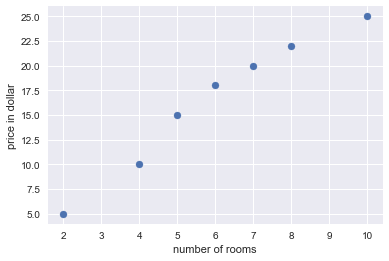

In [62]:
plt.scatter(df.X1,df.Y)
plt.xlabel('number of rooms')
plt.ylabel('price in dollar')

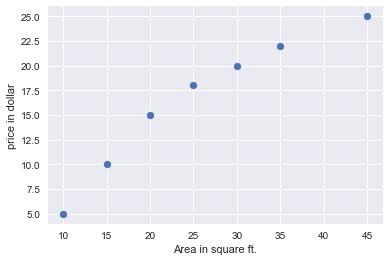

In [63]:
plt.scatter(df.X2,df.Y)

plt.xlabel('Area in square ft.')
plt.ylabel('price in dollar')


In [64]:
# The above graph shows as the number of rooms and its area increases the price of house increases too.
# The price of house is determined by the two factors: number of rooms and area in sq. ft. Thus, both the number of rooms
# and area in square ft. is labelled as the Explanatory variables or features and price of house is termed as 
# the Response variables. we will be using the term "X" for the Explanatory variables and "Y" for the Response variables.

In [65]:
# First, we will examine simple linear regression, which models the relationship betweena response variable and 
# single explanatory variable. Next, we will discuss multiple linear regression, 
# a generalization of simple linear regression that can support more than one explanatory variable

In [66]:
# To start, let's consider simple linear regression. Simple linear regression can be used to model 
# a linear relationship between one response variable and one explanatory variable

In [67]:
# Simple linear regression assumes that a linear relationship exists between the response variable and 
# explanatory variable; it models this relationship with a linear surface called a hyperplane. 
# A hyperplane is a subspace that has one dimension less than the ambient space that contains it.
# In simple linear regression, there is one dimension for the response variable and another dimension 
# for the explanatory variable, making a total of two dimensions. 
# The regression hyperplane therefore, has one dimension; a hyperplane with one dimension is a line.

In [68]:
# LinearRegression learns the parameters of the following model for simple linear regression:
#                     y=α+βx

In [69]:
import seaborn as sns

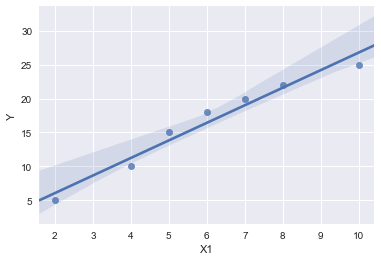

In [70]:
sns.regplot(x='X1',y='Y',data=df)

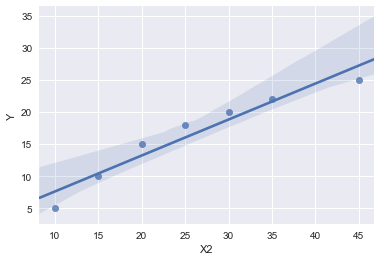

In [71]:
sns.regplot(x='X2',y='Y',data=df)

In [72]:
# Solving ordinary least squares for simple linear regression

In [73]:
# Recall that simple linear regression is given by the following equation:
# y=α+βx
# Also, recall that our goal is to solve the values of β and α that minimize the cost function. 
# We will solve β first. To do so, we will calculate the variance of x and covariance of x and y.

In [74]:
# beta = cov(X,y)/var(x)

In [75]:
covariance = np.cov(df.X1,df.Y)[0][1]

In [76]:
covariance

18.166666666666664

In [77]:
variance = np.var(df.X1)

In [78]:
variance

6.0

In [79]:
beta = covariance/variance

In [80]:
beta

3.0277777777777772

In [81]:
alpha = np.mean(df.Y)-(beta*(np.mean(df.X1)))

In [82]:
alpha

-1.7380952380952372

In [83]:
print ('The value of alpha: ',alpha)
print ('The value of beta:',beta)

('The value of alpha: ', -1.7380952380952372)
('The value of beta:', 3.0277777777777772)


In [84]:
# our learned model become:
#     y = alpha+beta*X

# Now, let us say we have to predict the price of house having 9-rooms,
# so new X=9, what is the new Y?

In [85]:
predict_y = alpha+(beta*9)

In [86]:
print ('The predicted price of house with 9 room is: ',predict_y)

('The predicted price of house with 9 room is: ', 25.511904761904759)


In [87]:
# let the X=3
predict_y = alpha+(beta*3)

In [88]:
print ('The predicted price of house with 3 room is: ',predict_y)

('The predicted price of house with 3 room is: ', 7.3452380952380949)


In [89]:
df

,X1,X2,Y
0,2,10,5
1,4,15,10
2,5,20,15
3,6,25,18
4,7,30,20
5,8,35,22
6,10,45,25


In [ ]:
# we will be using sci-kit learn library for the machine learning task

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
# LinearRegression is called as estimator, it implements two functions fit() and predict(). 
# Fit method is used for Training and Predict Method is used for prediction


In [92]:
model = LinearRegression()

In [98]:
X = df[['X1']]

In [99]:
y = df['Y']

In [100]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
print ('The value of beta:',model.coef_)

('The value of beta:', array([ 2.5952381]))


In [106]:
print ('The value of alpha:',model.intercept_)

('The value of alpha:', 0.85714285714285765)


In [109]:
print ('The predicted price of house with 9 room is: ',model.predict([[9]]))


('The predicted price of house with 9 room is: ', array([ 24.21428571]))


In [111]:
print ('The predicted price of house with 3 room is: ',model.predict([[3]]))


('The predicted price of house with 3 room is: ', array([ 8.64285714]))


In [112]:
df

,X1,X2,Y
0,2,10,5
1,4,15,10
2,5,20,15
3,6,25,18
4,7,30,20
5,8,35,22
6,10,45,25


In [113]:
# now let us understand the negative relationship between the explanatory variables and the response variables

In [114]:
# following is the dataset of weight of person and the distance, he/she covered while running

In [118]:
weight = np.array([15,20,25,30,35,40,45,50,50,80])
distance_covered = np.array([200,180,170,160,155,150,145,130,120,100])


In [119]:
df = pd.DataFrame({'X1':weight,'Y':distance_covered})

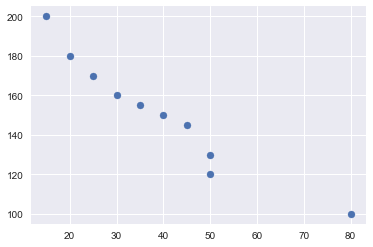

In [120]:
plt.scatter(df.X1,df.Y)

In [122]:
#model Validation

# we will be using the Train data set to make our model learn and test data set to vaidate our learned model